<a href="https://colab.research.google.com/github/ziyunli/notebooks/blob/master/notebooks/fastai/brz_or_wrx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# hide
from fastbook import *

In [3]:
import sys

print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [5]:
# hide
!pip install -Uqq duckduckgo_search

In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *


def search_images(term, max_images=200):
    return L(ddg_images(term, max_results=max_images)).itemgot("image")

In [7]:
urls = search_images("BRZ", max_images=1)
urls[0]

'https://i.gaw.to/content/photos/26/05/260528_2017_Subaru_BRZ.jpg'

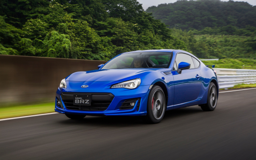

In [8]:
from fastdownload import download_url

dest = "BRZ.jpg"
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *

im = Image.open(dest)
im.to_thumb(256, 256)

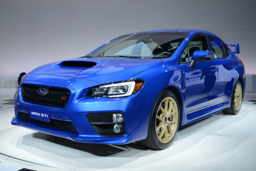

In [9]:
download_url(
    search_images("WRX", max_images=1)[0],
    "WRX.jpg",
    show_progress=False,
)
Image.open("WRX.jpg").to_thumb(256, 256)

In [11]:
from time import sleep

path = Path("Subaru")
keywords = ["BRZ", "WRX"]

for model in keywords:
    dest = path / model
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f"{model}"))
    sleep(10)
    resize_images(dest, max_size=400, dest=dest)

In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

17

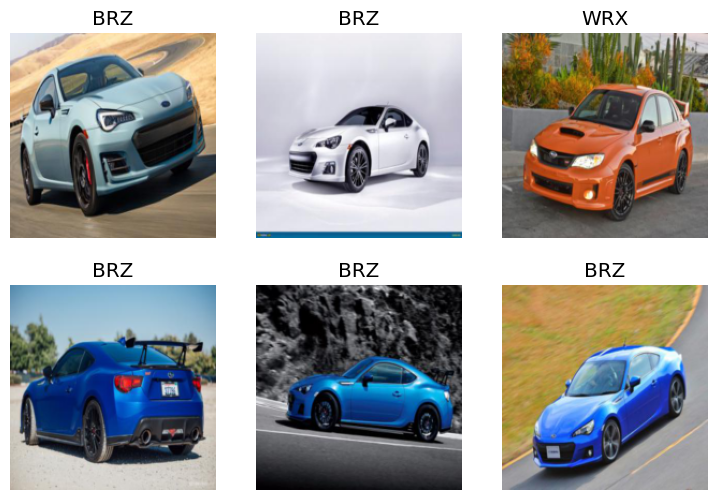

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")],
).dataloaders(path)

dls.show_batch(max_n=6)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 231MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.069936,1.141184,0.500000,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.475931,0.510507,0.229167,00:02
1,0.332171,0.476000,0.177083,00:02
2,0.237866,0.366121,0.135417,00:02


In [15]:
learn.predict(PILImage.create("WRX.jpg"))

('WRX', tensor(1), tensor([9.9740e-05, 9.9990e-01]))

In [16]:
learn.predict(PILImage.create("BRZ.jpg"))

('WRX', tensor(1), tensor([0.2956, 0.7044]))

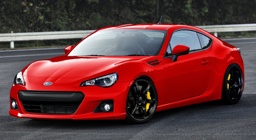

In [18]:
download_url(
    search_images("BRZ Red", max_images=1)[0],
    "BRZ_RED.jpg",
    show_progress=False,
)
Image.open("BRZ_RED.jpg").to_thumb(256, 256)

In [19]:
learn.predict(PILImage.create("BRZ_RED.jpg"))

('WRX', tensor(1), tensor([0.0557, 0.9443]))

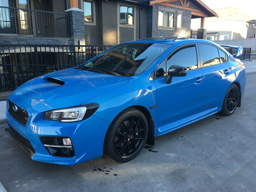

In [20]:
download_url(
    search_images("WRX Hikari", max_images=1)[0],
    "WRX_Hikari.jpg",
    show_progress=False,
)
Image.open("WRX_Hikari.jpg").to_thumb(256, 256)

In [21]:
learn.predict(PILImage.create("WRX_Hikari.jpg"))

('WRX', tensor(1), tensor([0.0013, 0.9987]))

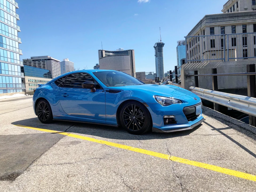

In [22]:
download_url(
    search_images("BRZ Hikari", max_images=1)[0],
    "BRZ_Hikari.jpg",
    show_progress=False,
)
Image.open("BRZ_Hikari.jpg").to_thumb(256, 256)

In [23]:
learn.predict(PILImage.create("BRZ_Hikari.jpg"))

('WRX', tensor(1), tensor([0.2909, 0.7091]))